<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/latency_vs_rr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Service 1

/tmp/ipython-input-7-1744058739.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Latency_norm'] = df_filtered['Latency'] / df_filtered['Latency'].max()
/tmp/ipython-input-7-1744058739.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Request Rate_norm'] = df_filtered['Request Rate'] / df_filtered['Request Rate'].max()
/tmp/ipython-input-7-1744058739.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

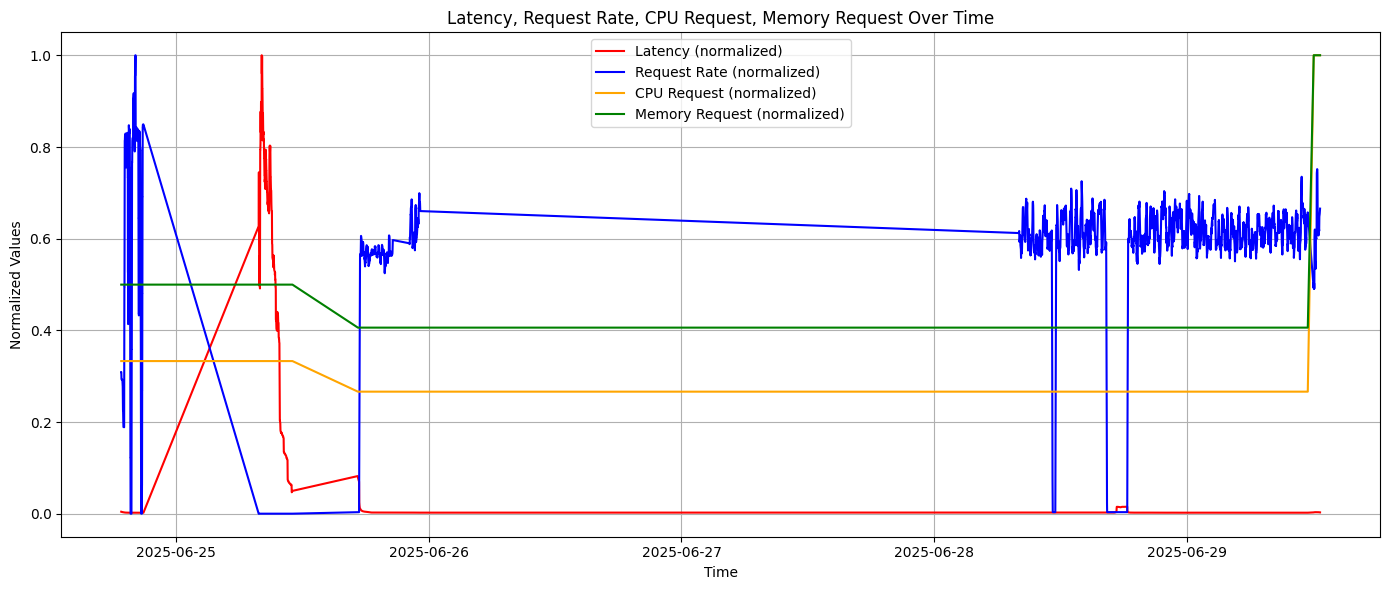

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("/content/service-1-deployment_dataset.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

# Filter date range
start_date = '2025-06-23'
end_date = '2025-06-30'
mask = (df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)
df_filtered = df.loc[mask]

# Optional: Normalize for visual comparison (Min-Max scaling)
df_filtered['Latency_norm'] = df_filtered['Latency'] / df_filtered['Latency'].max()
df_filtered['Request Rate_norm'] = df_filtered['Request Rate'] / df_filtered['Request Rate'].max()
df_filtered['CPU Request_norm'] = df_filtered['CPU Request'] / df_filtered['CPU Request'].max()
df_filtered['Memory Request_norm'] = df_filtered['Memory Request'] / df_filtered['Memory Request'].max()

# Plot all on the same axis (normalized)
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['Timestamp'], df_filtered['Latency_norm'], label='Latency (normalized)', color='red')
plt.plot(df_filtered['Timestamp'], df_filtered['Request Rate_norm'], label='Request Rate (normalized)', color='blue')
plt.plot(df_filtered['Timestamp'], df_filtered['CPU Request_norm'], label='CPU Request (normalized)', color='orange')
plt.plot(df_filtered['Timestamp'], df_filtered['Memory Request_norm'], label='Memory Request (normalized)', color='green')

plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.title('Latency, Request Rate, CPU Request, Memory Request Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


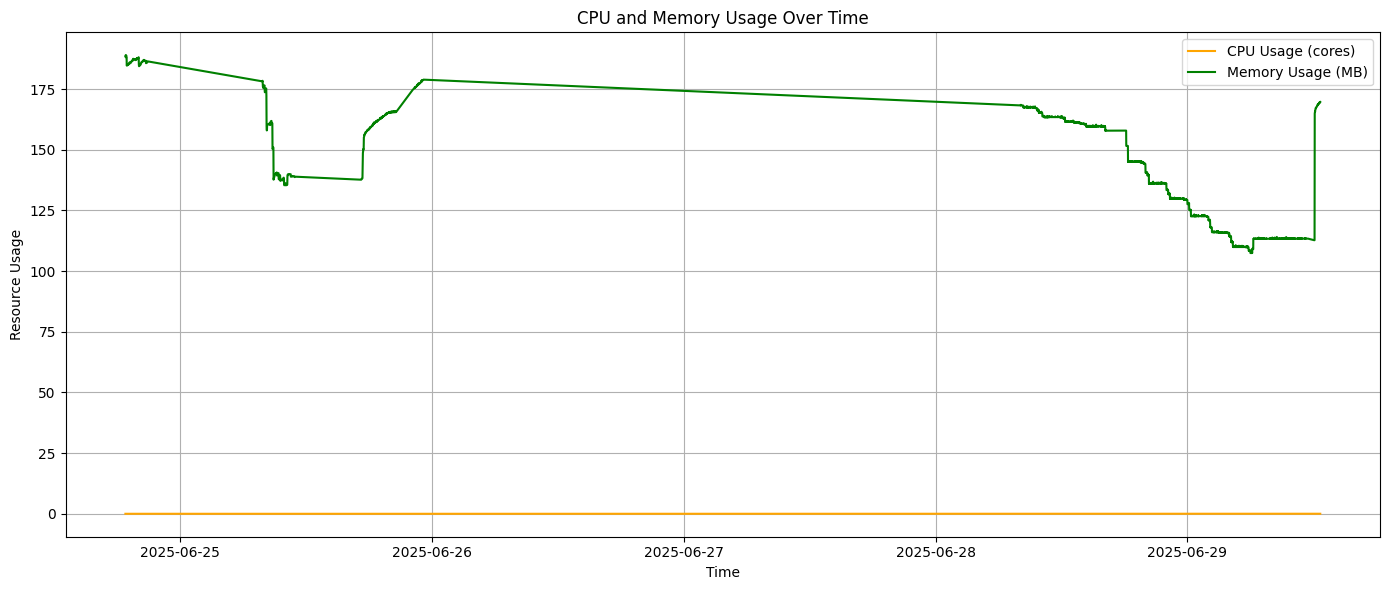

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/service-1-deployment_dataset.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

# Optional: Filter time range
start_date = '2025-06-23'
end_date = '2025-06-30'
df = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)]

# Plot
plt.figure(figsize=(14, 6))

# Plot CPU usage
plt.plot(df['Timestamp'], df['CPU Usage'], label='CPU Usage (cores)', color='orange')

# Plot Memory usage
plt.plot(df['Timestamp'], df['Memory Usage'] / (1024**2), label='Memory Usage (MB)', color='green')

plt.xlabel('Time')
plt.ylabel('Resource Usage')
plt.title('CPU and Memory Usage Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


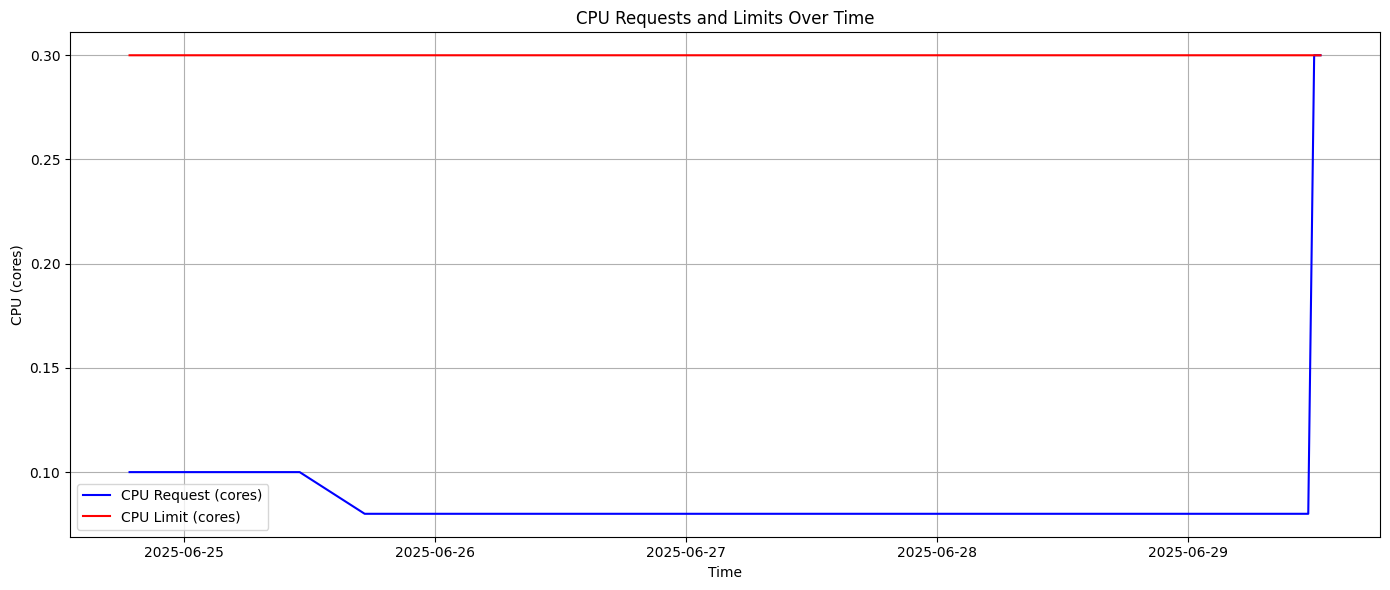

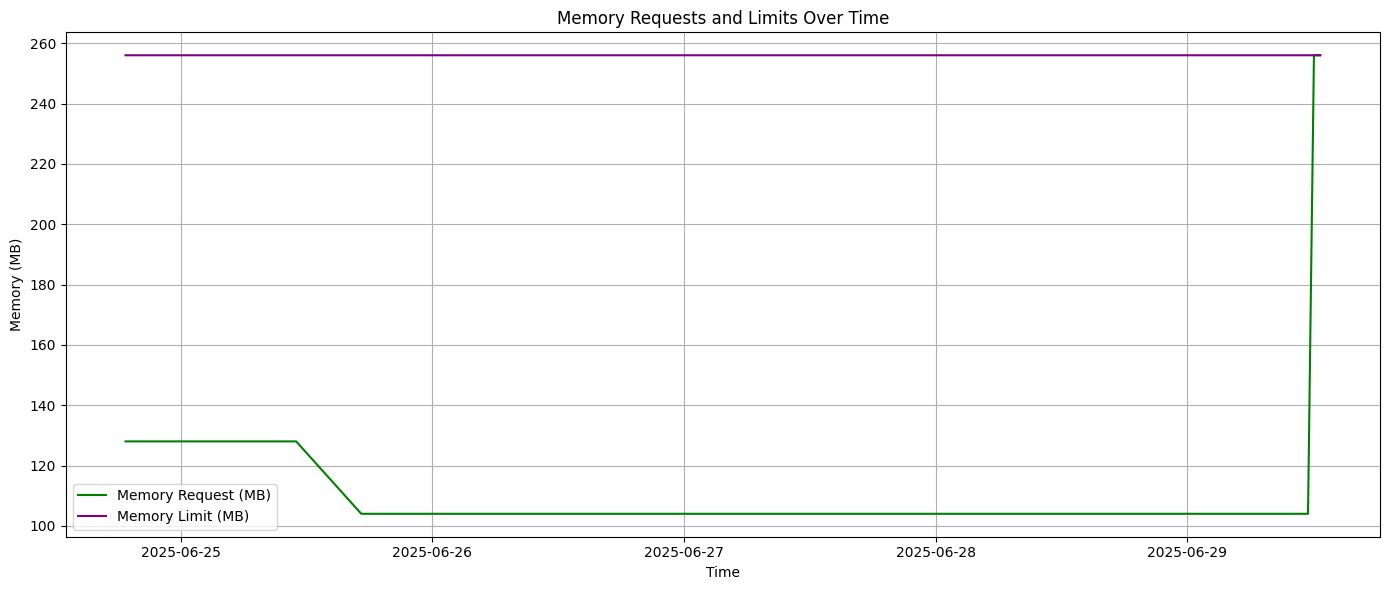

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/content/service-1-deployment_dataset.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

# Optional: Filter by time
df = df[(df['Timestamp'] >= '2025-06-23') & (df['Timestamp'] <= '2025-06-30')]

# Plot CPU Requests and Limits
plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['CPU Request'], label='CPU Request (cores)', color='blue')
plt.plot(df['Timestamp'], df['CPU Limit'], label='CPU Limit (cores)', color='red')
plt.xlabel('Time')
plt.ylabel('CPU (cores)')
plt.title('CPU Requests and Limits Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Memory Requests and Limits
plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['Memory Request'] / (1024**2), label='Memory Request (MB)', color='green')
plt.plot(df['Timestamp'], df['Memory Limit'] / (1024**2), label='Memory Limit (MB)', color='purple')
plt.xlabel('Time')
plt.ylabel('Memory (MB)')
plt.title('Memory Requests and Limits Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


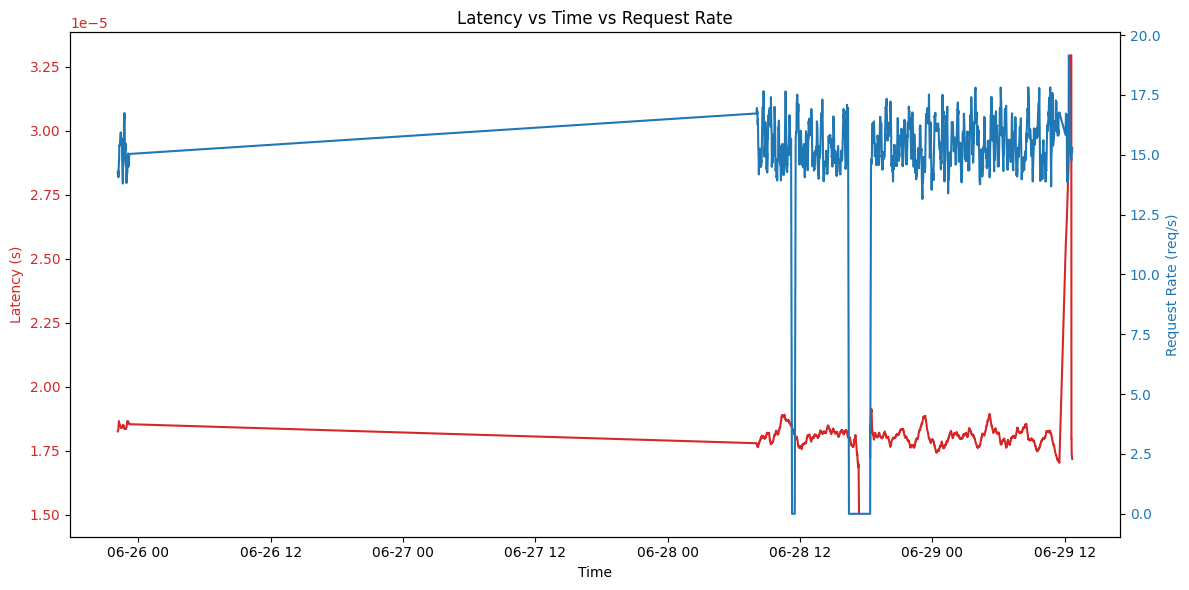

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("/content/service-2-deployment_dataset.csv")

# Convert timestamp to datetime if needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = 'mixed')

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Latency
ax1.set_xlabel('Time')
ax1.set_ylabel('Latency (s)', color='tab:red')
ax1.plot(df['Timestamp'], df['Latency'], color='tab:red', label='Latency')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for request rate
ax2 = ax1.twinx()
ax2.set_ylabel('Request Rate (req/s)', color='tab:blue')
ax2.plot(df['Timestamp'], df['Request Rate'], color='tab:blue', label='Request Rate')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and layout
plt.title('Latency vs Time vs Request Rate')
fig.tight_layout()
plt.show()
